In [823]:
using DataFrames, CSV, CategoricalArrays
using Statistics, Clustering, LinearAlgebra
using Plots

# Student Performancing

In [768]:
filename = "./datasets/student-mat.csv"
df0 = DataFrame(CSV.File(filename))
df0[1:5,:]

5×33 DataFrame
 Row │ school   sex      age    address  famsize  Pstatus  Medu   Fedu   Mjob  ⋯
     │ String3  String1  Int64  String1  String3  String1  Int64  Int64  Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ GP       F           18  U        GT3      A            4      4  at_ho ⋯
   2 │ GP       F           17  U        GT3      T            1      1  at_ho
   3 │ GP       F           15  U        LE3      T            1      1  at_ho
   4 │ GP       F           15  U        GT3      T            4      2  healt
   5 │ GP       F           16  U        GT3      T            3      3  other ⋯
                                                              25 columns omitted

In [10]:
grades = df0[[:G1, :G2, :G3]]
head(grades)

6×3 DataFrame
│ Row │ G1    │ G2    │ G3    │
│     │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ 5     │ 6     │ 6     │
│ 2   │ 5     │ 5     │ 6     │
│ 3   │ 7     │ 8     │ 10    │
│ 4   │ 15    │ 14    │ 15    │
│ 5   │ 6     │ 10    │ 10    │
│ 6   │ 15    │ 15    │ 15    │

#  California Housing

In [23]:
filename = "./datasets/housing.csv"
chdata = DataFrame(CSV.File(filename))
df = copy(chdata)


dropmissing!(df)

ndf = names(df)

10-element Vector{String}:
 "longitude"
 "latitude"
 "housing_median_age"
 "total_rooms"
 "total_bedrooms"
 "population"
 "households"
 "median_income"
 "median_house_value"
 "ocean_proximity"

## Data Preprocess


In [24]:
pos = df[!, ndf[1:2]]
pos = Array(pos)
km_pos = kmeans(pos |> transpose, 2)
df[!, "pos"] = km_pos.assignments


scatter(pos[:,1], pos[:,2])
scatter!(km_pos.centers[1,:], km_pos.centers[2,:])

In [25]:
dfop = CategoricalArray(df[!, "ocean_proximity"])
levels!(dfop, ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN", "ISLAND"])
dfop |> levels

5-element Vector{String15}:
 "<1H OCEAN"
 "INLAND"
 "NEAR BAY"
 "NEAR OCEAN"
 "ISLAND"

In [26]:
df[!, :lv_op] = levelcode.(dfop)
ndf = names(df)

12-element Vector{String}:
 "longitude"
 "latitude"
 "housing_median_age"
 "total_rooms"
 "total_bedrooms"
 "population"
 "households"
 "median_income"
 "median_house_value"
 "ocean_proximity"
 "pos"
 "lv_op"

In [33]:
sum(df[!, :lv_op] .== 1)

9034

In [576]:
df= df[df[!, :lv_op] .!= 5, :]

20428×12 DataFrame
   Row │ longitude  latitude  housing_median_age  total_rooms  total_bedrooms  ⋯
       │ Float64    Float64   Float64             Float64      Float64         ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │   -122.23     37.88                41.0        880.0           129.0  ⋯
     2 │   -122.22     37.86                21.0       7099.0          1106.0
     3 │   -122.24     37.85                52.0       1467.0           190.0
     4 │   -122.25     37.85                52.0       1274.0           235.0
     5 │   -122.25     37.85                52.0       1627.0           280.0  ⋯
     6 │   -122.25     37.85                52.0        919.0           213.0
     7 │   -122.25     37.84                52.0       2535.0           489.0
     8 │   -122.25     37.84                52.0       3104.0           687.0
     9 │   -122.26     37.84                42.0       2555.0           665.0  ⋯
    10 │   -122.25     37.84                52.0       3549.0           707.0
    11 │   -122.26     37.85                52.0       2202.0           434.0
   ⋮   │     ⋮         ⋮              ⋮                ⋮             ⋮         ⋱
 20419 │   -121.32     39.29                11.0       2640.0           505.0
 20420 │   -121.4      39.33                15.0       2655.0           493.0  ⋯
 20421 │   -121.45     39.26                15.0       2319.0           416.0
 20422 │   -121.53     39.19                27.0       2080.0           412.0
 20423 │   -121.56     39.27                28.0       2332.0           395.0
 20424 │   -121.09     39.48                25.0       1665.0           374.0  ⋯
 20425 │   -121.21     39.49                18.0        697.0           150.0
 20426 │   -121.22     39.43                17.0       2254.0           485.0
 20427 │   -121.32     39.43                18.0       1860.0           409.0
 20428 │   -121.24     39.37                16.0       2785.0           616.0  ⋯
                                                7 columns and 20407 rows omitted

In [741]:
name_of_y = :median_house_value
names_of_x = Symbol.(ndf[3:8])
names_of_z = Symbol.(ndf[11 : end])
dfy = df[!, name_of_y]
dfX = df[!, names_of_x]
dfZ = df[!, names_of_z]
dfZ[1:5,:]

5×2 DataFrame
 Row │ pos    lv_op 
     │ Int64  Int64 
─────┼──────────────
   1 │     2      3
   2 │     2      3
   3 │     2      3
   4 │     2      3
   5 │     2      3

In [131]:
sample = [dfX dfZ]
sample[:y] = df[:, name_of_y]
names(sample)

11-element Vector{String}:
 "longitude"
 "latitude"
 "housing_median_age"
 "total_rooms"
 "total_bedrooms"
 "population"
 "households"
 "median_income"
 "lv_op"
 "pos"
 "y"

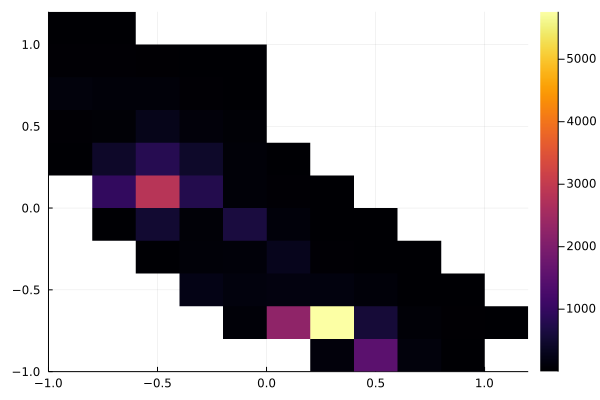

In [34]:
histogram2d(X[:,1], X[:,2])

In [133]:
mx = mean(X, dims = 1)

sx = std(X, dims = 1)

up_x = mx .+  3 * sx

ind = Bool.(ones(n))
for k in 1:n
ind[k] =  X[k, 4:7] < up_x[4:7]
end

In [134]:
sum(ind)

20057

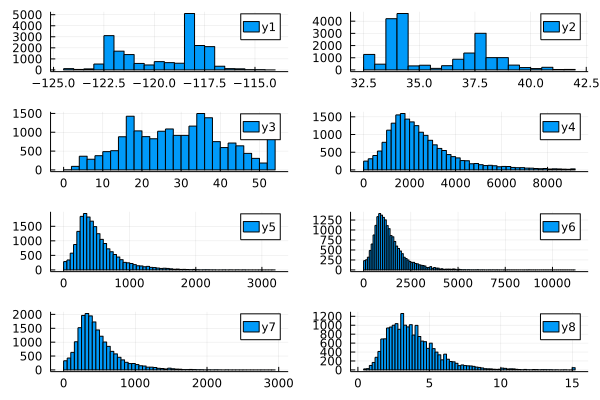

In [135]:
# X = scaler(X, 2)
X_ = X[ind, :]
figx = plot(layout = (4,2))
for k in 1:8
    pk = figx.subplots[k]
    histogram!(pk, X_[:, k])
end
    figx
    

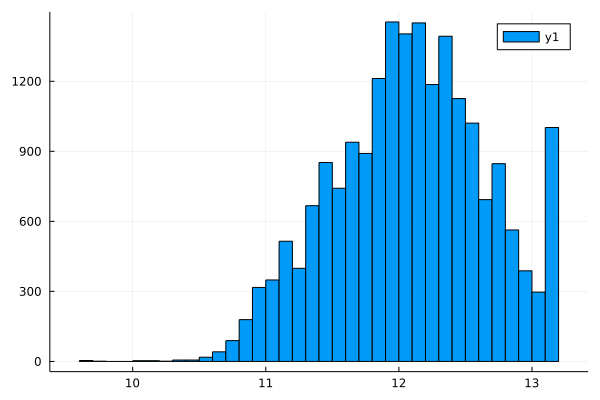

In [136]:
histogram(y[ind])

## GLM fitting

In [744]:
using GLM, QuantReg

┌ Info: Precompiling QuantReg [a0becc08-653f-40d2-91e7-721373d1053f]
└ @ Base loading.jl:1342
┌ Warning: Module DataFrames with build ID 1366377198511 is missing from the cache.
│ This may mean DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Info: Skipping precompilation since __precompile__(false). Importing QuantReg [a0becc08-653f-40d2-91e7-721373d1053f].
└ @ Base loading.jl:1047
┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1342
┌ Warning: Module ForwardDiff with build ID 1367428348610 is missing from the cache.
│ This may mean ForwardDiff [f6369f11-7733-5829-9624-2563aa707210] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Info: Skipping precompilation since __precompile__(false). Importing JuMP [4076af6c-e467-56ae-b986-b466b2749572].
└ @ Base loading.jl:1047


In [745]:
formula = Term(name_of_y) ~ sum([Term(x) for x in names_of_x])

FormulaTerm
Response:
  median_house_value(unknown)
Predictors:
  housing_median_age(unknown)
  total_rooms(unknown)
  total_bedrooms(unknown)
  population(unknown)
  households(unknown)
  median_income(unknown)

In [101]:
model = lm(formula, df[1:2000,:])

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

median_house_value ~ 1 + housing_median_age + total_rooms + total_bedrooms + population + households + median_income

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                           Coef.  Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)         -24763.6      5721.25     -4.33    <1e-04  -35983.9      -13543.4
housing_median_age    1206.56       98.1291   12.30    <1e-32    1014.11       1399.01
total_rooms              0.56757     2.35607   0.24    0.8097      -4.05305       5.18819
total_bedrooms          13.1151     22.4963    0.58    0.5600     -31.0037       57.2339
population             -35.7155      4.34982  -8.21    <1e-15     -4

In [60]:
cor(y, X[:,4])

0.18102224239954584

## QGPLSIM fitting

In [107]:
include("supportFunctions.ji")
include("qgplsim.ji")
include("get_califdata.ji")
using ProgressBars


In [10]:

Xa, Za, ya = califdata(3.0) # a for all

size(Xa)

(20057, 8)

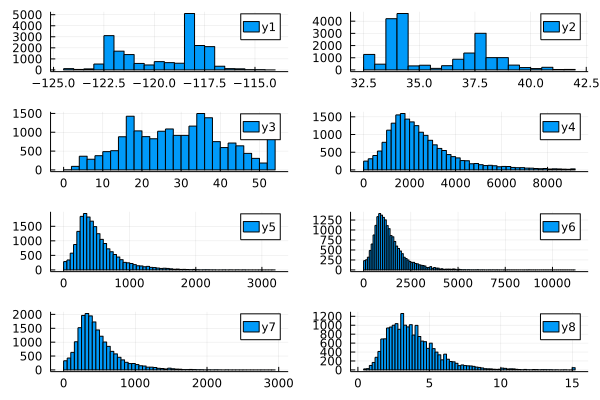

In [12]:
# X = scaler(X, 2)
using Plots
figx = plot(layout = (4,2))
for k in 1:8
    pk = figx.subplots[k]
    histogram!(pk, Xa[:, k])
end
    figx

In [108]:
nmc = 20
mse = zeros(nmc)
t = 1
X = scaler(Xa, 1)[:,[3,4,6,7,8]]
y = log.(ya)

Z = Za .- 1.0
Z[:, 2] = Z[:, 2] ./ maximum(Z[:, 2])
Z[:, 1] = Z[:, 1] ./ maximum(Z[:, 1])
# Z = Z[:, 1]
n,p = size(X)  
n,q = size(Z)
categ, index = collection(Z)

# categ

ncateg = length(categ)
prop = zeros(ncateg)

for k in 1:ncateg
    zk = categ[k]
    lenk = length(index[zk])
    prop[k] = lenk / n
end

ntrain = 2000
ntest = 2000
Theta = zeros(nmc, p)
Gamma = zeros(nmc, q)
Alpha = zeros(nmc, p)
Beta  = zeros(nmc, q)

width_exp = -0.01
tau = [0.5]
# tau = [0.25, 0.5, 0.75]
each_ntrain = Int.(round.(ntrain .* prop))
@threads for t in tqdm(1:nmc)

    indn = Array(1:n)
    indr = []
    for k in 1:ncateg
        zk = categ[k]
        indr = [indr; rand(index[zk], each_ntrain[k])]
    end

    indt = [x in indr for x in indn]
    indt = Bool.(1 .- indt)
    indt = rand(indn[indt], ntest)

    Xr = X[indr, :]
    yr = y[indr] 
    Zr = Z[indr, :]

    Xt = X[indt, :]
    yt = y[indt]  
    Zt = Z[indt, :]
    # categ, index = collection(Z)
    # for zk in categ
    #  println(zk, " ", length(index[zk]))
    # end
    # train_data = [Xr Zr yr]
    # histogram(train_data[:,6])
    # var(train_data, dims = 1)[1:6]


    qsmodel = qgplsim.model(Xr, Zr, yr, tau, width_exp)
    # for zk in qsmodel.categ
    #  println(zk, " ", length(qsmodel.index[zk]))
    # end

    # qsmodel1 = qgplsim.model(Xr, Zr, yr, 0.1)
    # qsmodel9 = qgplsim.model(Xr, Zr, yr, 0.9)
    # @time qgplsim.estimator(qsmodel1)
    # @time qgplsim.estimator(qsmodel9)

    Theta[t, :], Gamma[t, :],
    Alpha[t, :], Beta[t, :] = qgplsim.estimator(qsmodel)

    vv = Xt * qsmodel.alpha
    yl = Xt * qsmodel.theta
    yp = qgplsim.predict(qsmodel, Xt, Zt) + yl
    ## yp .= (abs.(yp) .> 1e2) .* 0 + (abs.(yp) .<= 1e2) .* yp
    bias = yt - yp
    res = sum(bias.^2) / ntest
    # println(res)
    mse[t] = res
end

0.0%┣                                               ┫ 0/20 [00:00<00:-1, -0s/it]
0.0%┣                                               ┫ 0/20 [00:00<00:-1, -0s/it]
0.0%┣                                               ┫ 0/20 [00:00<00:-1, -0s/it]
5.0%┣██▏                                        ┫ 1/20 [00:00<Inf:Inf, InfGs/it]
0.0%┣                                               ┫ 0/20 [00:00<00:-1, -0s/it]
10.0%┣████▋                                         ┫ 2/20 [01:36<28:47, 96s/it]
15.0%┣███████                                       ┫ 3/20 [01:36<13:37, 48s/it]
20.0%┣█████████▏                                    ┫ 4/20 [01:53<10:01, 38s/it]
25.0%┣███████████▌                                  ┫ 5/20 [01:58<07:21, 29s/it]
30.0%┣█████████████▉                                ┫ 6/20 [03:10<08:51, 38s/it]
35.0%┣████████████████                              ┫ 7/20 [03:33<07:42, 36s/it]
40.0%┣██████████████████▍                           ┫ 8/20 [03:43<06:21, 32s/it]
45.0%┣████████████████████▊ 

In [109]:
Theta

20×5 Matrix{Float64}:
 0.000146042  -0.110656   -0.750148   0.648507   0.0668737
 0.00286041    0.104379    0.761532  -0.639642  -0.00479056
 0.00979304    0.111967    0.724168  -0.675972  -0.0775222
 0.00433395    0.112744    0.778259  -0.616944  -0.031049
 0.00284766   -0.0280466  -0.771079   0.635652  -0.0242688
 0.00483399    0.0529684   0.787202  -0.613518  -0.0328418
 0.00621567    0.118058    0.766234  -0.630333  -0.0398636
 0.00391016    0.119333    0.788178  -0.601511  -0.0520049
 0.00629296   -0.0091608   0.920275  -0.390016  -0.0292851
 0.000210804  -0.0724184  -0.816543   0.569154   0.0638474
 0.00153266   -0.131334   -0.769238   0.623929   0.0416513
 0.00187903   -0.163019   -0.7324     0.657728   0.0663675
 0.00127305    0.0938705   0.781664  -0.616265  -0.020144
 0.009469      0.125677    0.724722  -0.676904  -0.0263663
 0.00129624    0.172459    0.691704  -0.699351  -0.0520547
 0.00401908   -0.141138   -0.751898   0.643548   0.0236491
 0.00596113    0.123058    0.659323

In [110]:
mean(Theta,dims = 1)

1×5 Matrix{Float64}:
 0.00395496  0.0299361  0.231179  -0.184643  -0.0069365

In [111]:
Gamma

20×2 Matrix{Float64}:
 -0.0177921   -0.00552363
  0.0765227   -0.116746
 -0.0658132   -0.00630943
 -0.0657778   -0.069017
  0.058065     0.0134182
 -0.0237403   -0.112035
  0.00160665   0.00534446
 -0.205017     0.0440803
 -0.0528886    0.00471277
  0.0271374    0.00762215
  0.0736812   -0.0451236
  0.0519333   -0.0398621
 -0.0490973   -0.0105646
 -0.0340143   -0.0297401
 -0.152085     0.0292661
  0.0528768   -0.098071
 -0.0451428   -0.0649494
  0.0228766   -0.00582093
 -0.0375162   -0.0473248
 -0.156907    -0.0468343

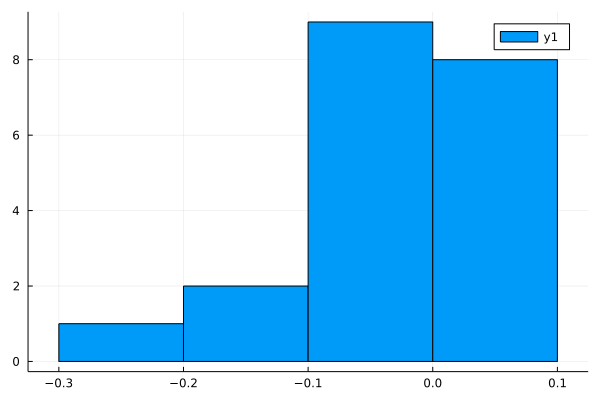

In [112]:
histogram(Gamma[:,1])

In [96]:
(Theta[1,:] |> transpose) * Alpha[1,:]

5.551115123125783e-16

In [113]:
mean(mse)

0.3073444964977077

In [114]:
var(mse)

0.044471852454580386

In [817]:
# histogram(vv)

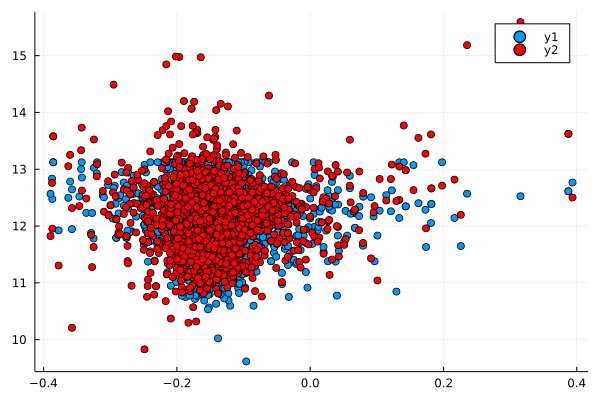

In [818]:
using Plots
scatter(vv, yt)
scatter!(vv, yp, color = "red")
# scatter!(vv, yp - yl)
# scatter!(vv, yl)


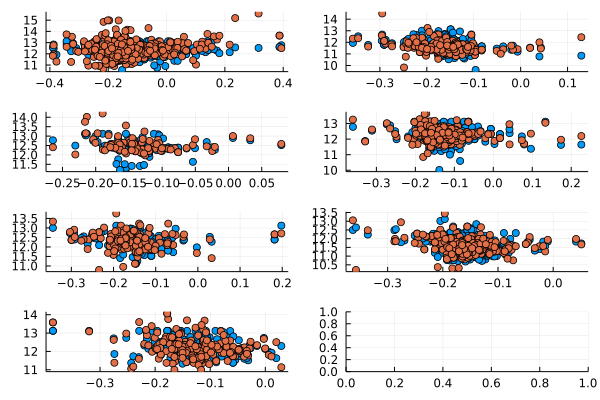

In [819]:
fig = plot(layouts = (4,2))
categ, index = collection(Zt)
for k in 1:7
    pk = fig.subplots[k]
    zk = categ[k]
    indk = index[zk]
    vk = vv[indk]
    ypk = yp[indk]
    # yp1k = yp1[indk]
    # yp9k = yp9[indk]
    ytk = yt[indk]
    scatter!(pk, vk, ytk, label = false)
    scatter!(pk, vk, ypk, label = false)
    # scatter!(pk, vk, yp1k, label = false)
    # scatter!(pk, vk, yp9k, label = false)
end
fig

In [55]:
g = zeros(n)
dg = zeros(n)
yl = Xr * qsmodel.theta
yz = yr - yl
τ = tau
v = Xr * qsmodel.alpha
categ, index = collection(Zr)
z = collect(index)
ncateg = index.count
width = zeros(ncateg)
v0 = -1e6
v1 = 1e6

# max_v = maximum(v)
# min_v = minimum(v)
# widv =   max_v - min_v    
# v = ((v .- min_v) / widv .- 0.5) * 4

for k in 1:ncateg
    vk = v[z[k][2]]
    h = (length(vk))^(width_exp) * std(vk)   
    # println(h)
    width[k] = h 

    dgk(u) = qgplsim.Gz(u, vk, yz[z[k][2]], 1, τ, width_exp)
    gk(u) = qgplsim.Gz(u, vk, yz[z[k][2]], 0, τ, width_exp)

    dg[z[k][2]] = dgk(vk)
    g[z[k][2]] = gk(vk)

    vkmin = minimum(vk) # + h
    vkmax = maximum(vk) # - h

    if  vkmin > v0
        v0 = vkmin
    end
    if  vkmax < v1
        v1 = vkmax
    end  
end

mh = minimum(width)
v0 = v0 + mh
v1 = v1 - mh


v_ = v[v .> v1]
_v = v[v .< v0]

v_ = minimum(v_)
_v = maximum(_v)
# _v, v_

C0 = zeros(ncateg)
C1 = zeros(ncateg)
dgf(vv, k) = qgplsim.Gz(vv, v[z[k][2]], yz[z[k][2]], 1, τ)


p1 = plot()
p2 = plot()
for m in 1:ncateg
    C0[m] = dgf(_v, m)[1]
    C1[m] = dgf(v_, m)[1]

    vm = v[index[categ[m]]]
    dgm = dg[index[categ[m]]]
    gm = g[index[categ[m]]]
    indm = sortperm(vm)
    sorted_dgm = dgm[indm]
    sorted_gm = gm[indm]
    sorted_vm = vm[indm]
    plot!(p1, sorted_vm, sorted_gm, label = false ) # L"g_{%$m} (v)")
    plot!(p2, sorted_vm, sorted_dgm, label = false ) # L"\nabla g_{%$m} (v)")

end

c0 = maximum(C0)
C1 = C1[C1 .> C0]
c1 = minimum(C1)
println("[$c0, $c1]")
println("[$v0, $v1]")

plot!(p2, [v0, v0], [c0, c1], color = "black", label = false)
plot!(p2, [v1, v1], [c0, c1], color = "black", label = false)
plot!(p2, [v0, v1], [c0, c0], color = "black", label = false)
plot!(p2, [v0, v1], [c1, c1], color = "black", label = false)


plot(p1, p2, layout = (1,2))

LoadError: UndefVarError: qsmodel not defined

In [755]:
std(v)

0.030923224803930123